In [1]:


import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()
using LinearAlgebra
using ForwardDiff
using PyPlot
     


  Activating project at `~/workspace/mujoco_simulators_python`


In [7]:
function GenerateRobot()
Tlist_init=[]
axis_list=[]
T0=[1 0 0 0.2;
    0 1 0 0;
    0 0 1 0;
    0 0 0 1]
push!(Tlist_init,T0)
for i in 1:6
    Tlist_init=push!(Tlist_init,Matrix{Float64}(I,4,4))
    axis_list=push!(axis_list,Matrix{Float64}(I,3,3))
end
arr=[]
push!(arr,[1 1;1 2])
push!(arr,[1 1;1 3])
end

GenerateRobot (generic function with 1 method)

In [29]:

print(arr[1])

[1 1; 1 2]

In [ ]:

function f(x)
    return x.^4 + x.^3 - x.^2 - x
end
     


In [5]:
function ∇f(x)
    return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
end
     


∇f (generic function with 1 method)

In [6]:

function ∇2f(x)
    return 12.0*x.^2 + 6.0*x - 2.0
end


∇2f (generic function with 1 method)

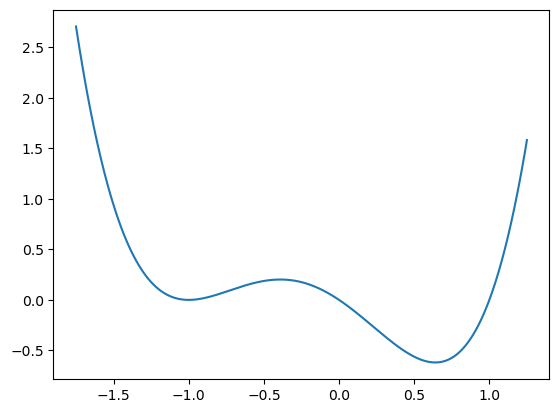

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87e39c5880>

In [7]:
     
x = LinRange(-1.75,1.25,1000)
p = plot(x,f(x))
     



In [8]:

function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end
     


newton_step (generic function with 1 method)

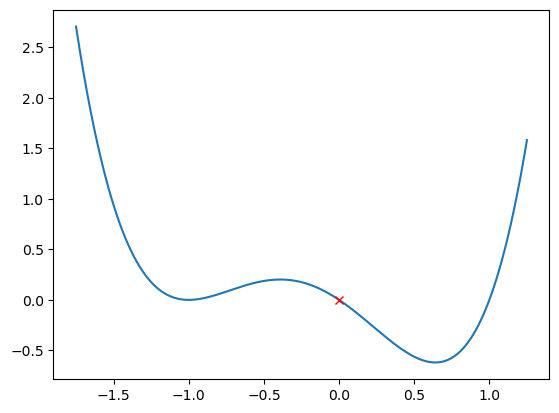

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87e3952460>

In [9]:

xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")
     



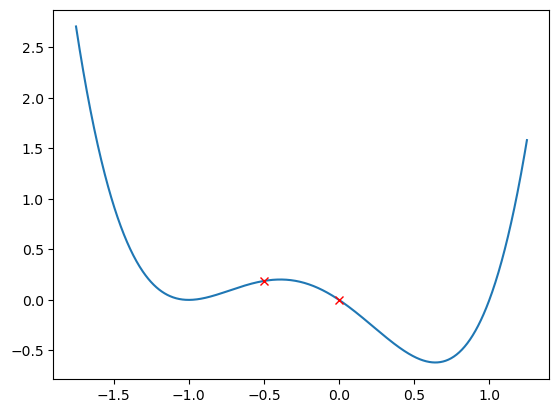

-2.0

In [10]:

xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")
    

∇2f(0.0)


In [11]:

function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end


regularized_newton_step (generic function with 1 method)

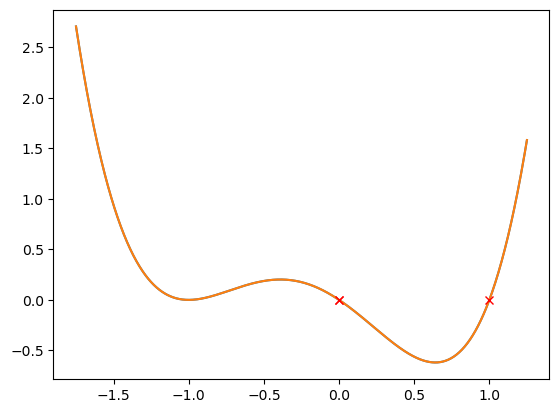

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87e35ce3d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f87e35ce4c0>

In [18]:


xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

     


     